In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import analysis

%matplotlib inline

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
start_val = 1000000
orders_file = 'testcases/orders-01.csv'


def read_orders(orders_file, start_val=1000000):
    orders_df = pd.read_csv(orders_file, index_col='Date', parse_dates=True, na_values=['nan'])

    syms = orders_df['Symbol'].values
    syms = np.unique(syms)

    sd = orders_df.index[0]
    ed = orders_df.index[-1]

    market_prices = analysis.get_data(sd, ed, syms)
    market_prices['CASH'] = 1.0

    trades_df = pd.DataFrame(data=0., columns=market_prices.columns, index=market_prices.index)
    shares_owned = pd.DataFrame(data=0., columns=market_prices.columns, index=market_prices.index)
    shares_owned['CASH'][0] = start_val

    # build the trading dataframe by buying shares and using cash
    for index, row in orders_df.iterrows():
        if row['Order'] == 'SELL':
            trades_df[row['Symbol']].loc[index] = -1 * row['Shares']
            trades_df['CASH'].loc[index] = trades_df['CASH'].loc[index] + market_prices[row['Symbol']].loc[index] * row['Shares']
        else:
            trades_df[row['Symbol']].loc[index] = row['Shares']
            trades_df['CASH'].loc[index] = trades_df['CASH'].loc[index] - market_prices[row['Symbol']].loc[index] * row['Shares']

    # update holdings based on trades
    for x in xrange(len(shares_owned)):
        if x > 0:
            shares_owned.iloc[x] = shares_owned.iloc[x-1]
        shares_owned.iloc[x] = shares_owned.iloc[x] + trades_df.iloc[x]

    # build portfolio
    my_portfolio = shares_owned * market_prices
    my_portfolio['Portfolio'] = my_portfolio.sum(axis=1)
    
    return my_portfolio, sd, ed



Start Date: 2011-01-10 00:00:00
End Date: 2011-12-28 00:00:00
Portfolio contains: Index([u'GOOG', u'IBM', u'XOM', u'CASH'], dtype='object')


                    Portfolio vs. Benchmark
Sharpe Ratio:           1.132 vs. 0.133
Volatility:             0.020 vs. 0.015
Average Daily Return: 0.00145 vs. 0.00012
Cumulative Return:      0.367 vs. 0.004
Final Value:       1366538.81 vs. 1003692.60




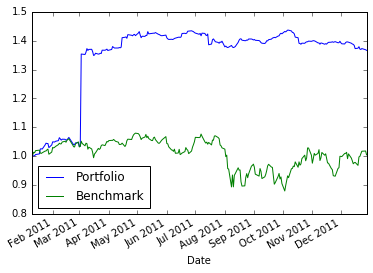

In [3]:
my_portfolio, sd, ed = read_orders('testcases/orders-01.csv', start_val=1000000)
spy = analysis.get_benchmark(sd, ed, start_val= start_val)
analysis.print_results(my_portfolio, spy, True)

Start Date: 2011-01-10 00:00:00
End Date: 2011-12-28 00:00:00
Portfolio contains: Index([u'GOOG', u'IBM', u'XOM', u'CASH'], dtype='object')


                    Portfolio vs. Benchmark
Sharpe Ratio:           0.969 vs. 0.133
Volatility:             0.005 vs. 0.015
Average Daily Return: 0.00033 vs. 0.00012
Cumulative Return:      0.081 vs. 0.004
Final Value:       1008875.93 vs. 1003692.60




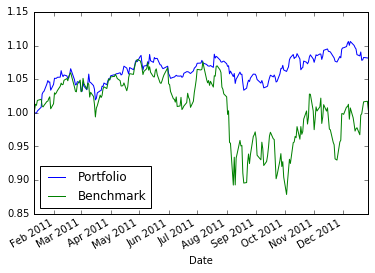

In [4]:
my_portfolio2, sd, ed = read_orders('testcases/orders-02.csv', start_val=1000000)
spy = analysis.get_benchmark(sd, ed, start_val= start_val)
analysis.print_results(my_portfolio2, spy, True)

Start Date: 2011-01-10 00:00:00
End Date: 2011-12-20 00:00:00
Portfolio contains: Index([u'GOOG', u'IBM', u'XOM', u'CASH'], dtype='object')


                    Portfolio vs. Benchmark
Sharpe Ratio:           -1.050 vs. 0.102
Volatility:             0.006 vs. 0.015
Average Daily Return: -0.00043 vs. 0.00009
Cumulative Return:      -0.101 vs. -0.004
Final Value:        898926.67 vs.  996456.17




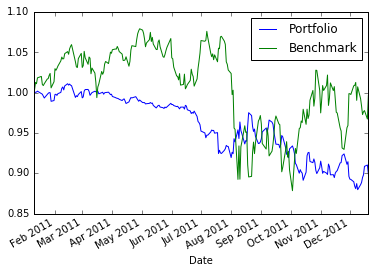

In [5]:
my_portfolio3, sd, ed = read_orders('testcases/orders-03.csv', start_val=1000000)
spy = analysis.get_benchmark(sd, ed, start_val= start_val)
analysis.print_results(my_portfolio3, spy, True)

Start Date: 2008-01-14 00:00:00
End Date: 2008-12-12 00:00:00
Portfolio contains: Index([u'BAC', u'GOOG', u'IBM', u'CASH'], dtype='object')


                    Portfolio vs. Benchmark
Sharpe Ratio:           0.259 vs. -0.931
Volatility:             0.008 vs. 0.027
Average Daily Return: 0.00013 vs. -0.00157
Cumulative Return:      0.023 vs. -0.360
Final Value:       1023043.81 vs.  639850.76




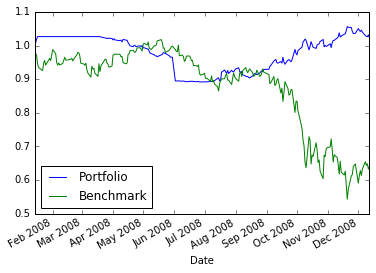

In [6]:
my_portfolio4, sd, ed = read_orders('testcases/orders-04.csv', start_val=1000000)
spy = analysis.get_benchmark(sd, ed, start_val= start_val)
analysis.print_results(my_portfolio4, spy, True)

Start Date: 2009-05-04 00:00:00
End Date: 2010-07-06 00:00:00
Portfolio contains: Index([u'BAC', u'GLD', u'GOOG', u'IBM', u'XOM', u'CASH'], dtype='object')


                    Portfolio vs. Benchmark
Sharpe Ratio:           1.971 vs. 0.759
Volatility:             0.005 vs. 0.012
Average Daily Return: 0.00066 vs. 0.00058
Cumulative Return:      0.208 vs. 0.160
Final Value:       1208148.42 vs. 1160134.70




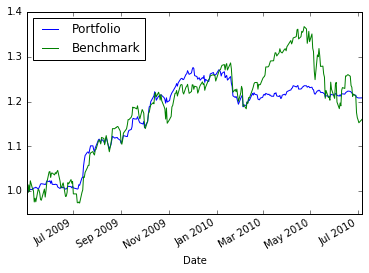

In [7]:
my_portfolio5, sd, ed = read_orders('testcases/orders-05.csv', start_val=1000000)
spy = analysis.get_benchmark(sd, ed, start_val= start_val)
analysis.print_results(my_portfolio5, spy, True)

Start Date: 2007-01-10 00:00:00
End Date: 2007-11-07 00:00:00
Portfolio contains: Index([u'GOOG', u'IBM', u'XOM', u'CASH'], dtype='object')


                    Portfolio vs. Benchmark
Sharpe Ratio:           -1.552 vs. 0.535
Volatility:             0.005 vs. 0.009
Average Daily Return: -0.00053 vs. 0.00032
Cumulative Return:      -0.107 vs. 0.059
Final Value:        892726.52 vs. 1058670.35




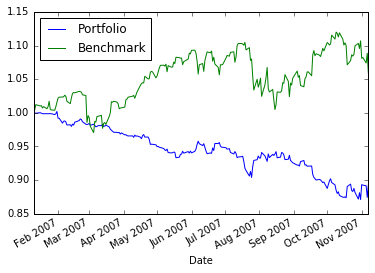

In [8]:
my_portfolio6, sd, ed = read_orders('testcases/orders-06.csv', start_val=1000000)
spy = analysis.get_benchmark(sd, ed, start_val= start_val)
analysis.print_results(my_portfolio6, spy, True)

Start Date: 2009-01-14 00:00:00
End Date: 2009-12-21 00:00:00
Portfolio contains: Index([u'GOOG', u'IBM', u'XOM', u'CASH'], dtype='object')


                    Portfolio vs. Benchmark
Sharpe Ratio:           -1.034 vs. 1.334
Volatility:             0.008 vs. 0.017
Average Daily Return: -0.00051 vs. 0.00141
Cumulative Return:      -0.121 vs. 0.350
Final Value:        878547.85 vs. 1350092.09




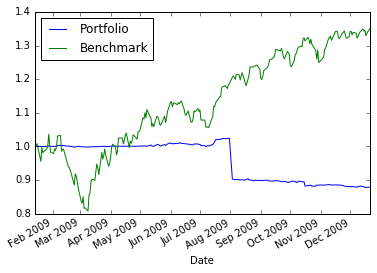

In [9]:
my_portfolio7, sd, ed = read_orders('testcases/orders-07.csv', start_val=1000000)
spy = analysis.get_benchmark(sd, ed, start_val= start_val)
analysis.print_results(my_portfolio7, spy, True)

Start Date: 2010-01-12 00:00:00
End Date: 2010-12-07 00:00:00
Portfolio contains: Index([u'GOOG', u'IBM', u'XOM', u'CASH'], dtype='object')


                    Portfolio vs. Benchmark
Sharpe Ratio:           0.775 vs. 0.636
Volatility:             0.002 vs. 0.012
Average Daily Return: 0.00010 vs. 0.00047
Cumulative Return:      0.023 vs. 0.096
Final Value:       1022595.57 vs. 1096129.18




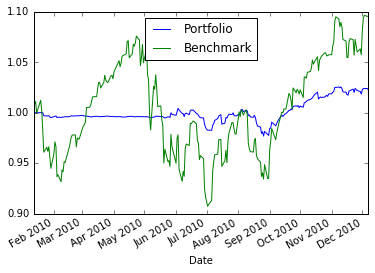

In [10]:
my_portfolio8, sd, ed = read_orders('testcases/orders-08.csv', start_val=1000000)
spy = analysis.get_benchmark(sd, ed, start_val= start_val)
analysis.print_results(my_portfolio8, spy, True)

Start Date: 2011-01-10 00:00:00
End Date: 2011-03-03 00:00:00
Portfolio contains: Index([u'GOOG', u'IBM', u'XOM', u'CASH'], dtype='object')


                    Portfolio vs. Benchmark
Sharpe Ratio:           3.050 vs. 2.828
Volatility:             0.007 vs. 0.008
Average Daily Return: 0.00141 vs. 0.00142
Cumulative Return:      0.051 vs. 0.051
Final Value:        933800.02 vs. 1051110.39




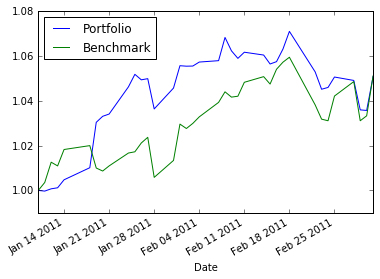

In [11]:
my_portfolio9, sd, ed = read_orders('testcases/orders-09.csv', start_val=1000000)
spy = analysis.get_benchmark(sd, ed, start_val= start_val)
analysis.print_results(my_portfolio9, spy, True)

Start Date: 2011-01-10 00:00:00
End Date: 2011-12-20 00:00:00
Portfolio contains: Index([u'GOOG', u'IBM', u'XOM', u'CASH', u'Portfolio'], dtype='object')


                    Portfolio vs. Benchmark
Sharpe Ratio:           -1.050 vs. 0.383
Volatility:             0.006 vs. 0.008
Average Daily Return: -0.00043 vs. 0.00020
Cumulative Return:      -0.101 vs. 0.024
Final Value:        898926.67 vs. 1023631.00




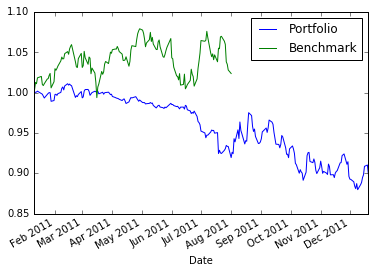

In [12]:
my_portfolio10, sd, ed = read_orders('testcases/orders-10.csv', start_val=1000000)
spy = analysis.get_benchmark(sd, ed, start_val= start_val)
analysis.print_results(my_portfolio3, spy, True)

Start Date: 2011-01-10 00:00:00
End Date: 2011-03-03 00:00:00
Portfolio contains: Index([u'GOOG', u'IBM', u'XOM', u'CASH'], dtype='object')


                    Portfolio vs. Benchmark
Sharpe Ratio:           1.459 vs. 2.828
Volatility:             0.009 vs. 0.008
Average Daily Return: 0.00084 vs. 0.00142
Cumulative Return:      0.029 vs. 0.051
Final Value:        914516.52 vs. 1051110.39




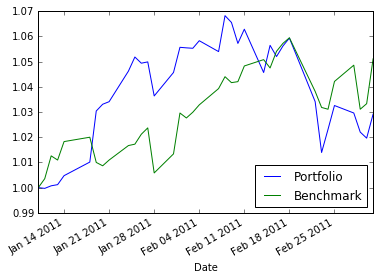

In [13]:
my_portfolio11, sd, ed = read_orders('testcases/orders-11.csv', start_val=1000000)
spy = analysis.get_benchmark(sd, ed, start_val= start_val)
analysis.print_results(my_portfolio11, spy, True)

Start Date: 2011-01-10 00:00:00
End Date: 2011-12-20 00:00:00
Portfolio contains: ['GOOG' 'IBM' 'XOM' 'CASH']


                    Portfolio vs. Benchmark
Sharpe Ratio:           1.102 vs. 0.102
Volatility:             0.007 vs. 0.015
Average Daily Return: 0.00049 vs. 0.00009
Cumulative Return:      0.118 vs. -0.004
Final Value:       1117516.52 vs.  996456.17




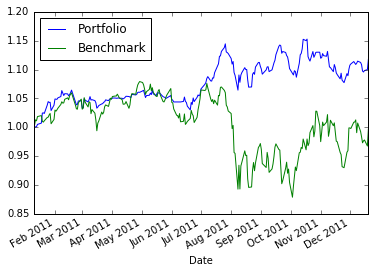

In [15]:
my_portfolio12, sd, ed = read_orders('testcases/orders-12.csv', start_val=1000000)
spy = analysis.get_benchmark(sd, ed, start_val= start_val)
analysis.print_results(my_portfolio12, spy, True)